# Step 2: Exploratory Data Analysis (EDA)

## Objective
- Understand patterns and distributions in the cleaned churn dataset
- Visualize churn rates across key features
- Identify relationships between features and target variable
- Highlight actionable insights for retention strategies

In [1]:
# import requierd libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Display options
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

# save figures in reports/figures/
figures_path = "../reports/figures/"

os.makedirs(figures_path, exist_ok=True)


In [2]:
data_path = "C:\\Users\\admin\\OneDrive\\Desktop\\CHURN PREDICTION\\customer-churn-prediction\\data\\processed\\churn_clean.csv"
df = pd.read_csv(data_path)
# Verify load
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


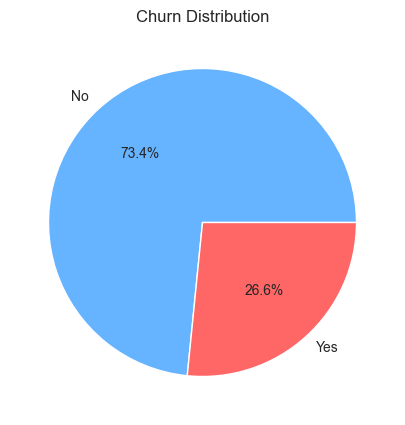

In [3]:
# 1. Churn Distribution - Pie Chart
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=['No','Yes'], autopct='%1.1f%%', colors=['#66b3ff','#ff6666'])
plt.title("Churn Distribution")
plt.savefig(os.path.join(figures_path, "churn_distribution_pie.png"), bbox_inches='tight')
plt.show()

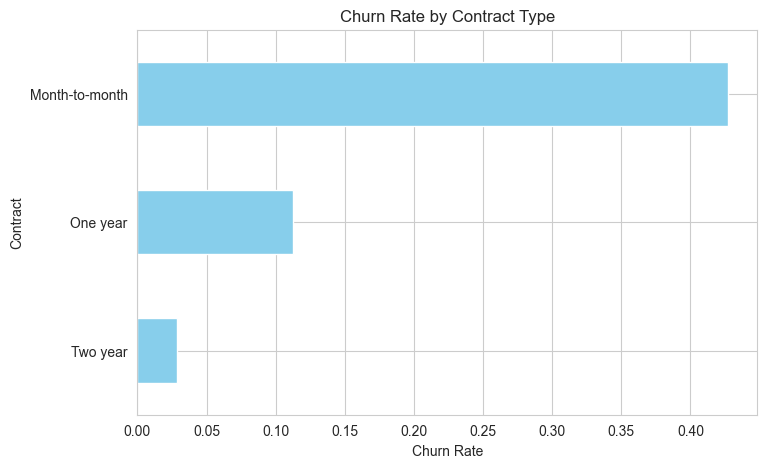

In [4]:
# 2. Contract Type vs Churn - Horizontal Bar
contract_churn = df.groupby('Contract')['Churn'].mean().sort_values()
contract_churn.plot(kind='barh', color='skyblue')
plt.xlabel("Churn Rate")
plt.title("Churn Rate by Contract Type")
plt.savefig(os.path.join(figures_path, "contract_churn_barh.png"), bbox_inches='tight')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_1576\3038852656.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='tenure', data=df, palette=['#66b3ff','#ff6666'])


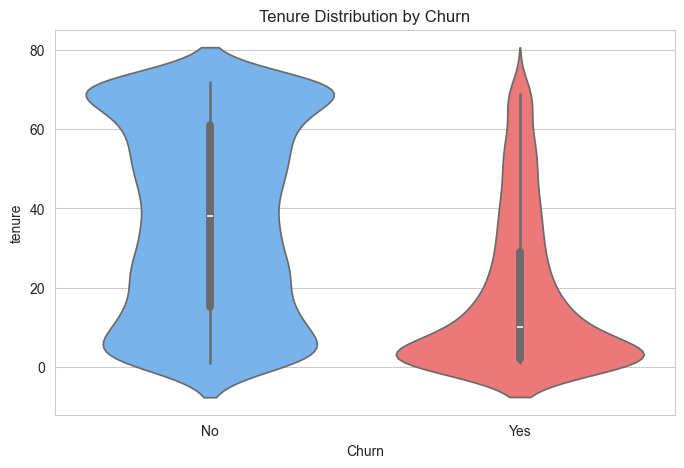

In [5]:
# 3. Tenure vs Churn - Violin
sns.violinplot(x='Churn', y='tenure', data=df, palette=['#66b3ff','#ff6666'])
plt.title("Tenure Distribution by Churn")
plt.xticks([0,1], ["No", "Yes"])
plt.savefig(os.path.join(figures_path, "tenure_churn_violin.png"), bbox_inches='tight') 
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_1576\1337347668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=['#66b3ff','#ff6666'])
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\

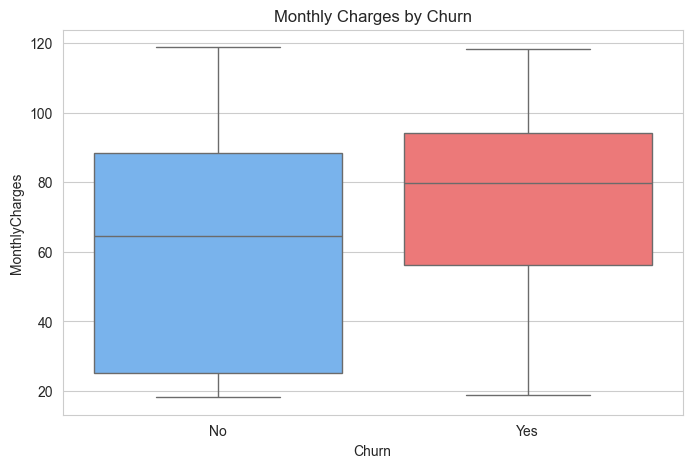

In [6]:
# 4. Monthly Charges vs Churn - Boxplot
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=['#66b3ff','#ff6666'])
plt.title("Monthly Charges by Churn")
plt.xticks([0,1], ["No", "Yes"])
plt.savefig(os.path.join(figures_path, "monthlycharges_churn_box.png"), bbox_inches='tight')
plt.show()

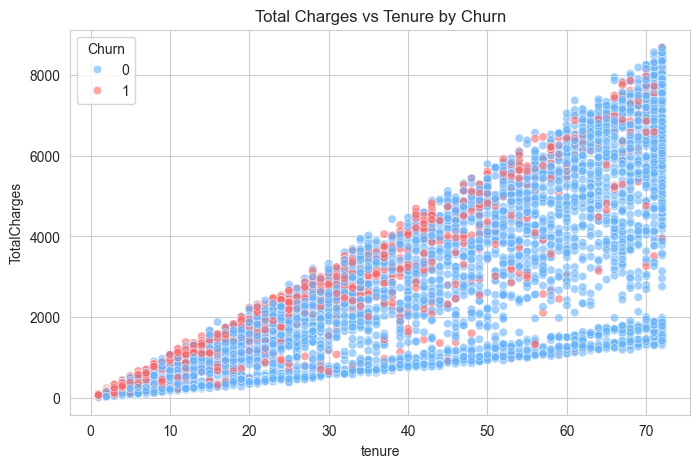

In [7]:
# 5. Total Charges vs Tenure - Scatter
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df,
                palette=['#66b3ff','#ff6666'], alpha=0.6)
plt.title("Total Charges vs Tenure by Churn")
plt.savefig(os.path.join(figures_path, "totalcharges_tenure_scatter.png"), bbox_inches='tight')
plt.show()

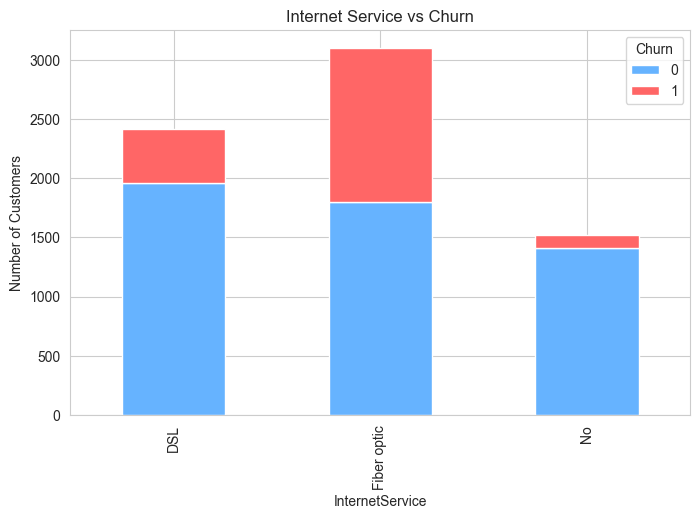

In [8]:
# 6. Internet Services vs Churn - Stacked Bar
internet_churn = pd.crosstab(df['InternetService'], df['Churn'])
internet_churn.plot(kind='bar', stacked=True, color=['#66b3ff','#ff6666'])
plt.title("Internet Service vs Churn")
plt.ylabel("Number of Customers")
plt.savefig(os.path.join(figures_path, "internetservice_churn_stacked.png"), bbox_inches='tight')
plt.show()

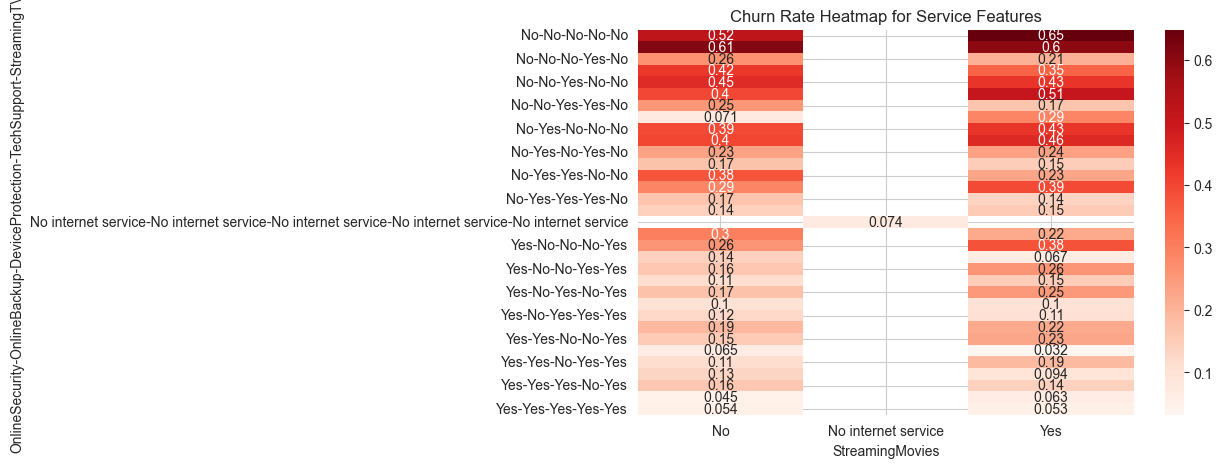

In [9]:
# 7. Service Features - Heatmap
service_cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
service_churn = df[service_cols + ['Churn']].groupby(service_cols)['Churn'].mean().unstack()
sns.heatmap(service_churn, annot=True, cmap="Reds")
plt.title("Churn Rate Heatmap for Service Features")
plt.savefig(os.path.join(figures_path, "service_churn_heatmap.png"), bbox_inches='tight')
plt.show()

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

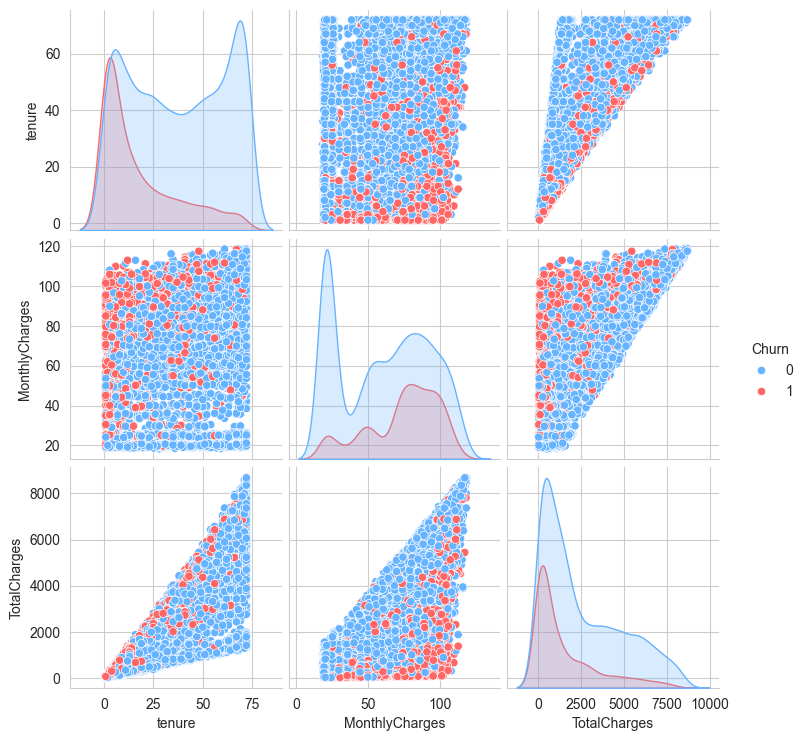

In [10]:
# 8. Pairplot for numeric features
sns.pairplot(df[['tenure','MonthlyCharges','TotalCharges','Churn']], hue='Churn', palette=['#66b3ff','#ff6666'])
plt.savefig(os.path.join(figures_path, "numeric_pairplot.png"), bbox_inches='tight')
plt.show()

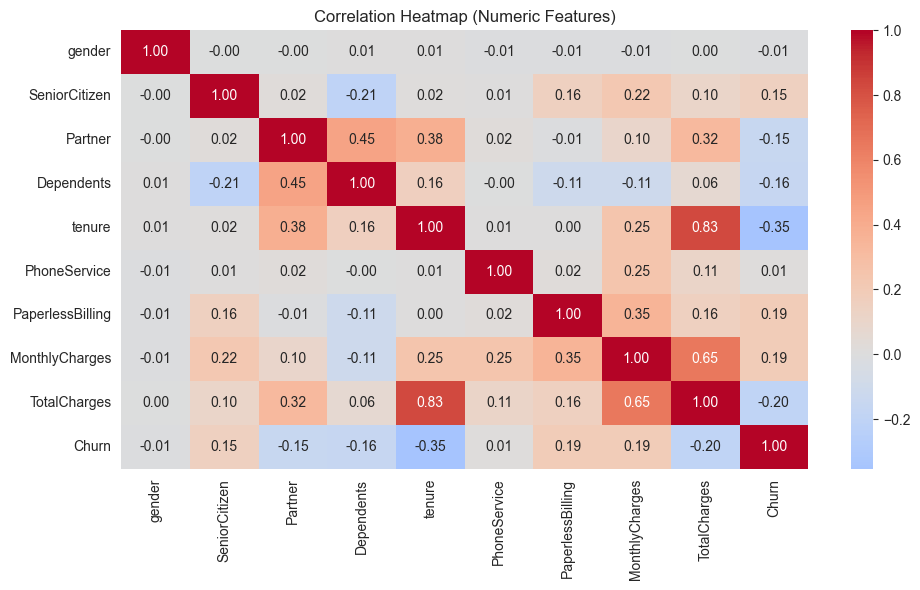

In [11]:
# 9. Correlation Heatmap
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.savefig(os.path.join(figures_path, "correlation_heatmap.png"))
plt.show()



# Exploratory Data Analysis (EDA) Summary — Telco Customer Churn

## 1. Churn Overview
- Overall churn rate: **~26.5%** of customers.
- Moderate class imbalance exists, which should be considered during modeling.

## 2. Contract Type
- Month-to-month customers have the **highest churn**.
- One-year and two-year contracts show significantly **lower churn rates**.
- Suggestion: Focus retention campaigns on **short-term contract customers**.

## 3. Internet Service
- Customers with **Fiber optic** service churn more than DSL or No internet service.
- Suggestion: Identify Fiber customers at risk and offer incentives or service improvements.

## 4. Tenure
- New customers (tenure < 12 months) are **most likely to churn**.
- Longer-tenure customers have lower churn, indicating loyalty builds over time.

## 5. Monthly Charges
- Higher monthly charges correlate with slightly higher churn.
- Suggestion: Consider pricing incentives or bundling options for high-paying customers.

## 6. Total Charges
- Customers with **low total charges** are more likely to churn — usually short-term customers.
- Indicates the need for **early engagement strategies**.

## 7. Service Features
- Lack of **Online Security** or **Tech Support** is associated with higher churn.
- Streaming services have a smaller effect but can be part of bundled offers.
- Suggestion: Promote optional service add-ons to reduce churn risk.

## 8. Demographics
- Senior citizens have slightly higher churn than non-seniors.
- Partner or dependent status affects churn marginally; more targeted campaigns may be needed.

## 9. Correlations & Feature Insights
- Strong negative correlation: **tenure vs Churn** (longer tenure → lower churn)
- Positive correlation: **MonthlyCharges vs Churn**
- Binary service features weakly correlate individually but are valuable when combined.
- Numeric features like tenure, MonthlyCharges, and TotalCharges are **key predictors**.

## 10. Visualization Insights
- **Pie chart** gives immediate visual of churn distribution.
- **Violin & boxplots** highlight numeric feature differences by churn.
- **Stacked bars & heatmaps** reveal categorical and service combinations affecting churn.
- **Scatter & pair plots** provide a complete picture of numeric feature interactions.

## ✅ Actionable Takeaways
1. Focus retention strategies on **month-to-month and Fiber optic customers**.
2. Offer **early engagement programs** to new customers (<12 months tenure).
3. Promote **optional services** like Online Security and Tech Support.
4. Monitor **high MonthlyCharges customers** for potential churn.
5. Leverage insights for **feature engineering** in the next modeling stage.
